                                                                                                  Michael Gonzalez
                                                                                                  Fall 2019
                                                                                                  DSC 540
                                                                                                  October 2,2019

# 6.3 Assignment: Mid-Term Project

## Importing the needed package to preform this mid-term project.

In [9]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import random
import pandas as pd
import statsmodels.formula.api as smf

## Clean up the data 

In [10]:
"""I will remove the missing data by using the drop.na() function. I am removing a variable called SMULEV, 
it represent the counties and the dataset already has a variable called county. I am treating it as a duplicate."""

df = pd.read_excel('C:\\Users\\gonzm200\\Downloads\\fall2019_midterm_project\\2018_census_estimate_data.xlsx', sheet_name = 'Sheet1')

df = df.drop(columns = "SUMLEV")
df.describe()

,STATE,COUNTY,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,...,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE
count,59698.000000,59698.000000,59698.0,59698.000000,5.969800e+04,5.969800e+04,5.969800e+04,5.969800e+04,5.969800e+04,59698.000000,...,59698.000000,59698.000000,59698.000000,59698.000000,59698.000000,59698.000000,5.969800e+04,5.969800e+04,59698.000000,59698.000000
mean,30.280076,103.572884,11.0,9.000000,1.096075e+04,5.398127e+03,5.562624e+03,4.154296e+03,4.225853e+03,703.074642,...,308.854769,338.758216,13.573688,13.208382,148.331368,151.393246,4.286327e+03,4.359878e+03,769.242822,833.552950
std,15.142056,107.687821,0.0,5.477271,8.187103e+04,4.026728e+04,4.161688e+04,2.915148e+04,2.940806e+04,6635.076323,...,4972.691541,5493.294214,263.364682,258.635579,1347.397972,1368.513512,3.018369e+04,3.045374e+04,7069.432822,8093.342633
min,1.000000,1.000000,11.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,18.000000,35.000000,11.0,4.000000,5.880000e+02,2.880000e+02,2.970000e+02,2.400000e+02,2.450000e+02,3.000000,...,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,2.450000e+02,2.510000e+02,5.000000,4.000000
50%,29.000000,79.000000,11.0,9.000000,1.502000e+03,7.460000e+02,7.550000e+02,6.300000e+02,6.470000e+02,25.000000,...,4.000000,5.000000,0.000000,0.000000,10.000000,10.000000,6.430000e+02,6.600000e+02,32.000000,26.000000
75%,45.000000,133.000000,11.0,14.000000,4.579750e+03,2.256000e+03,2.315000e+03,1.913000e+03,1.958000e+03,176.000000,...,24.000000,30.000000,2.000000,2.000000,40.000000,41.000000,1.963000e+03,2.011000e+03,200.000000,189.000000
max,56.000000,840.000000,11.0,18.000000,1.010552e+07,4.981895e+06,5.123623e+06,3.579978e+06,3.571466e+06,562873.000000,...,725276.000000,826618.000000,47754.000000,46325.000000,154391.000000,158868.000000,3.713977e+06,3.708726e+06,586686.000000,698707.000000


## Replace headers (Data Wrangling with Python pg. 154 – 163) 

In [11]:
#The variable headers need to be renamed so, we can tell them apart.

df.rename(
    columns = {
        "STNAME": "State_Name",
        "CTYNAME": "County_Name",
        "AGEGRP": "Age_Group",
        "TOT_POP": "Total_Population",
        "TOT_MALE": "Total_Male_Pop",
        "TOT_FEMALE": "Total_Female_Pop",
        "WA_MALE": "White_Alone_Male_Pop",
        "WA_FEMALE": "White_Alone_Female_Pop",
        "BA_MALE": "Black_Alone_Male_Pop",
        "BA_FEMALE": "Black_Alone_Female_Pop",
        "IA_MALE": "American_Indian_Alone_Male_Pop",
        "IA_FEMALE": "American_Indian_Alone_Female_Pop",
        "AA_MALE": "Asian_Alone_Male_Pop",
        "AA_FEMALE": "Asian_Alone_Female_Pop",
        "TOM_MALE": "Multi_Alone_Male_Pop",
        "TOM_FEMALE": "Multi_Alone_Female_Pop",
        "WAC_MALE": "White_Combo_Male_Pop",
        "WAC_FEMALE": "White_Combo_Female_Pop",
        "BAC_MALE": "Black_Combo_Male_Pop",
        "BAC_FEMALE": "Pacific_Combo_Female_Pop",
    },
    inplace = True
)

df.head()

,STATE,COUNTY,State_Name,County_Name,YEAR,Age_Group,Total_Population,Total_Male_Pop,Total_Female_Pop,White_Alone_Male_Pop,...,Asian_Alone_Male_Pop,Asian_Alone_Female_Pop,NA_MALE,NA_FEMALE,Multi_Alone_Male_Pop,Multi_Alone_Female_Pop,White_Combo_Male_Pop,White_Combo_Female_Pop,Black_Combo_Male_Pop,Pacific_Combo_Female_Pop
0,1,1,Alabama,Autauga County,11,0,55601,26995,28606,20859,...,301,380,33,29,528,488,21334,22246,5442,6021
1,1,1,Alabama,Autauga County,11,1,3364,1728,1636,1240,...,29,19,3,4,97,81,1333,1242,426,420
2,1,1,Alabama,Autauga County,11,2,3423,1779,1644,1296,...,14,23,2,2,98,76,1388,1266,433,396
3,1,1,Alabama,Autauga County,11,3,3882,1977,1905,1467,...,15,31,4,4,55,61,1516,1470,472,429
4,1,1,Alabama,Autauga County,11,4,3755,1913,1842,1395,...,26,11,4,3,52,56,1442,1435,462,421


In [12]:
df.describe()

,STATE,COUNTY,YEAR,Age_Group,Total_Population,Total_Male_Pop,Total_Female_Pop,White_Alone_Male_Pop,White_Alone_Female_Pop,Black_Alone_Male_Pop,...,Asian_Alone_Male_Pop,Asian_Alone_Female_Pop,NA_MALE,NA_FEMALE,Multi_Alone_Male_Pop,Multi_Alone_Female_Pop,White_Combo_Male_Pop,White_Combo_Female_Pop,Black_Combo_Male_Pop,Pacific_Combo_Female_Pop
count,59698.000000,59698.000000,59698.0,59698.000000,5.969800e+04,5.969800e+04,5.969800e+04,5.969800e+04,5.969800e+04,59698.000000,...,59698.000000,59698.000000,59698.000000,59698.000000,59698.000000,59698.000000,5.969800e+04,5.969800e+04,59698.000000,59698.000000
mean,30.280076,103.572884,11.0,9.000000,1.096075e+04,5.398127e+03,5.562624e+03,4.154296e+03,4.225853e+03,703.074642,...,308.854769,338.758216,13.573688,13.208382,148.331368,151.393246,4.286327e+03,4.359878e+03,769.242822,833.552950
std,15.142056,107.687821,0.0,5.477271,8.187103e+04,4.026728e+04,4.161688e+04,2.915148e+04,2.940806e+04,6635.076323,...,4972.691541,5493.294214,263.364682,258.635579,1347.397972,1368.513512,3.018369e+04,3.045374e+04,7069.432822,8093.342633
min,1.000000,1.000000,11.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,18.000000,35.000000,11.0,4.000000,5.880000e+02,2.880000e+02,2.970000e+02,2.400000e+02,2.450000e+02,3.000000,...,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,2.450000e+02,2.510000e+02,5.000000,4.000000
50%,29.000000,79.000000,11.0,9.000000,1.502000e+03,7.460000e+02,7.550000e+02,6.300000e+02,6.470000e+02,25.000000,...,4.000000,5.000000,0.000000,0.000000,10.000000,10.000000,6.430000e+02,6.600000e+02,32.000000,26.000000
75%,45.000000,133.000000,11.0,14.000000,4.579750e+03,2.256000e+03,2.315000e+03,1.913000e+03,1.958000e+03,176.000000,...,24.000000,30.000000,2.000000,2.000000,40.000000,41.000000,1.963000e+03,2.011000e+03,200.000000,189.000000
max,56.000000,840.000000,11.0,18.000000,1.010552e+07,4.981895e+06,5.123623e+06,3.579978e+06,3.571466e+06,562873.000000,...,725276.000000,826618.000000,47754.000000,46325.000000,154391.000000,158868.000000,3.713977e+06,3.708726e+06,586686.000000,698707.000000


## Format Data to a Readable Format (Data Wrangling with Python pg. 164 – 168)

In [13]:
df.dtypes

STATE                                int64
COUNTY                               int64
State_Name                          object
County_Name                         object
YEAR                                 int64
Age_Group                            int64
Total_Population                     int64
Total_Male_Pop                       int64
Total_Female_Pop                     int64
White_Alone_Male_Pop                 int64
White_Alone_Female_Pop               int64
Black_Alone_Male_Pop                 int64
Black_Alone_Female_Pop               int64
American_Indian_Alone_Male_Pop       int64
American_Indian_Alone_Female_Pop     int64
Asian_Alone_Male_Pop                 int64
Asian_Alone_Female_Pop               int64
NA_MALE                              int64
NA_FEMALE                            int64
Multi_Alone_Male_Pop                 int64
Multi_Alone_Female_Pop               int64
White_Combo_Male_Pop                 int64
White_Combo_Female_Pop               int64
Black_Combo

In [14]:
df['STATE'] = df['STATE'].astype('str')
df['COUNTY'] = df['COUNTY'].astype('str') 

df["YEAR"] = df["YEAR"].replace(11, "7/1/2018") 
df["YEAR"] = pd.to_datetime(df["YEAR"])

In [15]:
#The Age_Group variable needs to be replaced as a string.

df["Age_Group"]= df["Age_Group"].replace(0, "Total") 
df["Age_Group"]= df["Age_Group"].replace(1, "0 to 4 yrs") 
df["Age_Group"]= df["Age_Group"].replace(2, "5 to 9 yrs") 
df["Age_Group"]= df["Age_Group"].replace(3, "10 to 14 yrs") 
df["Age_Group"]= df["Age_Group"].replace(4, "15 to 19 yrs") 
df["Age_Group"]= df["Age_Group"].replace(5, "20 to 24 yrs") 
df["Age_Group"]= df["Age_Group"].replace(6, "25 to 29 yrs") 
df["Age_Group"]= df["Age_Group"].replace(7, "30 to 34 yrs") 
df["Age_Group"]= df["Age_Group"].replace(8, "35 to 39 yrs") 
df["Age_Group"]= df["Age_Group"].replace(9, "40 to 44 yrs") 
df["Age_Group"]= df["Age_Group"].replace(10, "45 to 49 yrs") 
df["Age_Group"]= df["Age_Group"].replace(11, "50 to 54 yrs") 
df["Age_Group"]= df["Age_Group"].replace(12, "55 to 59 yrs") 
df["Age_Group"]= df["Age_Group"].replace(13, "60 to 64 yrs") 
df["Age_Group"]= df["Age_Group"].replace(14, "65 to 69 yrs") 
df["Age_Group"]= df["Age_Group"].replace(15, "70 to 74 yrs") 
df["Age_Group"]= df["Age_Group"].replace(16, "75 to 69 yrs") 
df["Age_Group"]= df["Age_Group"].replace(17, "80 to 84 yrs") 
df["Age_Group"]= df["Age_Group"].replace(18, "85 yrs plus") 

df.head()

,STATE,COUNTY,State_Name,County_Name,YEAR,Age_Group,Total_Population,Total_Male_Pop,Total_Female_Pop,White_Alone_Male_Pop,...,Asian_Alone_Male_Pop,Asian_Alone_Female_Pop,NA_MALE,NA_FEMALE,Multi_Alone_Male_Pop,Multi_Alone_Female_Pop,White_Combo_Male_Pop,White_Combo_Female_Pop,Black_Combo_Male_Pop,Pacific_Combo_Female_Pop
0,1,1,Alabama,Autauga County,2018-07-01,Total,55601,26995,28606,20859,...,301,380,33,29,528,488,21334,22246,5442,6021
1,1,1,Alabama,Autauga County,2018-07-01,0 to 4 yrs,3364,1728,1636,1240,...,29,19,3,4,97,81,1333,1242,426,420
2,1,1,Alabama,Autauga County,2018-07-01,5 to 9 yrs,3423,1779,1644,1296,...,14,23,2,2,98,76,1388,1266,433,396
3,1,1,Alabama,Autauga County,2018-07-01,10 to 14 yrs,3882,1977,1905,1467,...,15,31,4,4,55,61,1516,1470,472,429
4,1,1,Alabama,Autauga County,2018-07-01,15 to 19 yrs,3755,1913,1842,1395,...,26,11,4,3,52,56,1442,1435,462,421


In [16]:
df.dtypes

STATE                                       object
COUNTY                                      object
State_Name                                  object
County_Name                                 object
YEAR                                datetime64[ns]
Age_Group                                   object
Total_Population                             int64
Total_Male_Pop                               int64
Total_Female_Pop                             int64
White_Alone_Male_Pop                         int64
White_Alone_Female_Pop                       int64
Black_Alone_Male_Pop                         int64
Black_Alone_Female_Pop                       int64
American_Indian_Alone_Male_Pop               int64
American_Indian_Alone_Female_Pop             int64
Asian_Alone_Male_Pop                         int64
Asian_Alone_Female_Pop                       int64
NA_MALE                                      int64
NA_FEMALE                                    int64
Multi_Alone_Male_Pop           

## Identify outliers and bad data (Data Wrangling with Python pg. 169 – 174) 

In [17]:
# I will be checking for any null data in the coulmns of the dataset.

df.isnull().sum(axis = 0)

STATE                               0
COUNTY                              0
State_Name                          0
County_Name                         0
YEAR                                0
Age_Group                           0
Total_Population                    0
Total_Male_Pop                      0
Total_Female_Pop                    0
White_Alone_Male_Pop                0
White_Alone_Female_Pop              0
Black_Alone_Male_Pop                0
Black_Alone_Female_Pop              0
American_Indian_Alone_Male_Pop      0
American_Indian_Alone_Female_Pop    0
Asian_Alone_Male_Pop                0
Asian_Alone_Female_Pop              0
NA_MALE                             0
NA_FEMALE                           0
Multi_Alone_Male_Pop                0
Multi_Alone_Female_Pop              0
White_Combo_Male_Pop                0
White_Combo_Female_Pop              0
Black_Combo_Male_Pop                0
Pacific_Combo_Female_Pop            0
dtype: int64

In [18]:
# I will be checking again for any null data in the dataset.
sum(df.isnull().sum(axis = 1))

0L

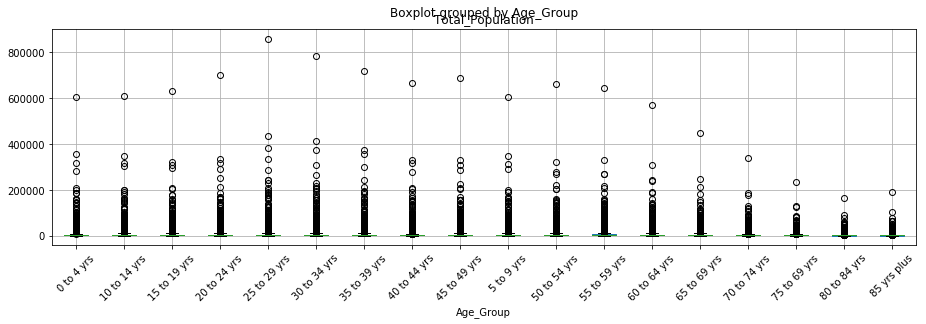

In [19]:
"""I will be using the total population and age group varibles, 
as my camparisons while I am looking for outliers. I will not include the total variable in this graph."""

dfbp = df[df.Age_Group != 'Total']

boxplot = dfbp.boxplot(column = ['Total_Population'], by = 'Age_Group',figsize = (15,4), rot = 45)

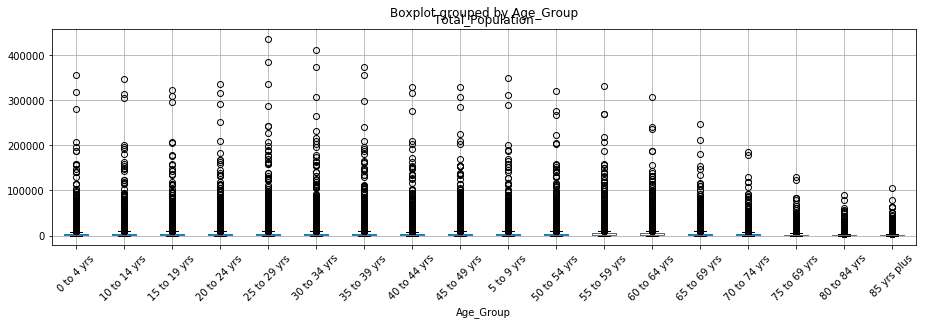

In [20]:
"""I have noticed that Los Angeles County is an outlier.
I will exclude the Los Angeles County from this new graph."""

dfbp = dfbp[dfbp.County_Name != 'Los Angeles County']

boxplot = dfbp.boxplot(column = ['Total_Population'], by = 'Age_Group', figsize = (15,4), rot = 45)

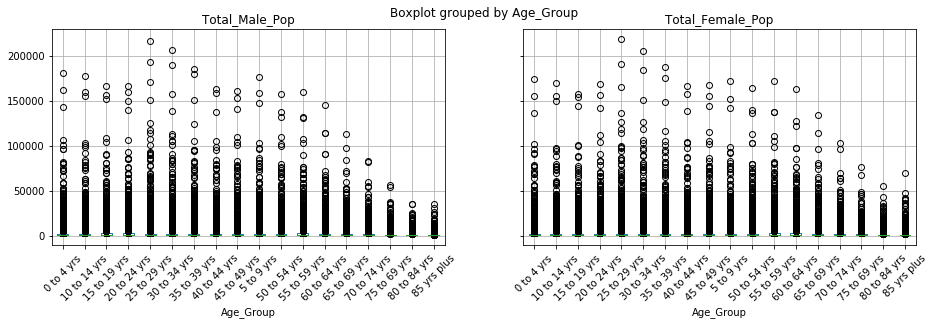

In [21]:
#I will compare the male and female populations variable with the age group variable. 

boxplot = dfbp.boxplot(column = ['Total_Male_Pop', 'Total_Female_Pop'], by = 'Age_Group', figsize = (15,4), rot = 45)

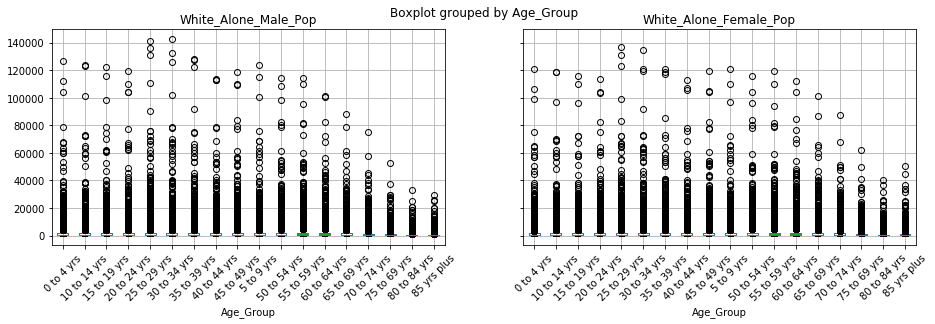

In [22]:
#I Will also compare the different ethnicity groups of males and females in the following graphs.

boxplot = dfbp.boxplot(column = ['White_Alone_Male_Pop', 'White_Alone_Female_Pop'], by = 'Age_Group', figsize = (15,4), rot = 45)

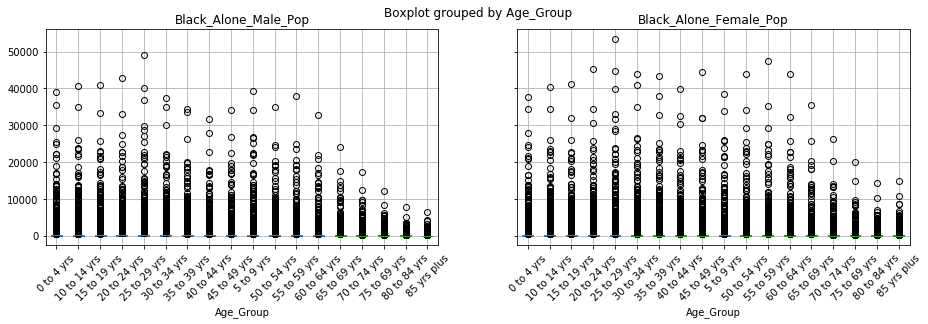

In [23]:
boxplot = dfbp.boxplot(column = ['Black_Alone_Male_Pop', 'Black_Alone_Female_Pop'], by = 'Age_Group',figsize = (15,4), rot = 45)

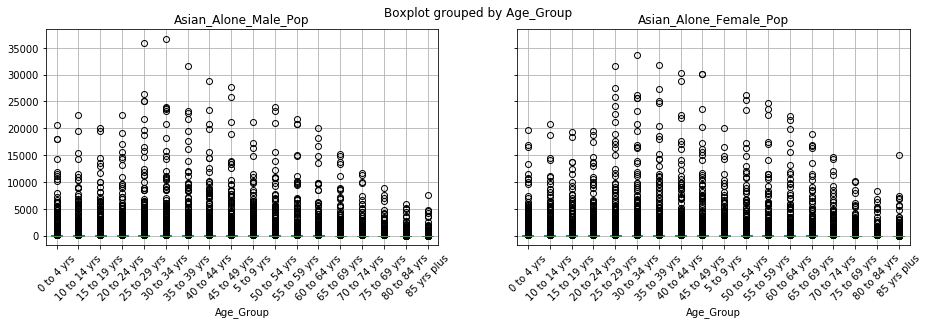

In [24]:
boxplot = dfbp.boxplot(column = ['Asian_Alone_Male_Pop', 'Asian_Alone_Female_Pop'], by = 'Age_Group',figsize = (15,4), rot = 45)

## Find Duplicates (Data Wrangling with Python pg. 175 – 178)

In [25]:
"""I will be looking for duplicate counties for this mid term project. I will be looking at the total age group
variable and I will create a dataframe of this variable."""

totage = df[df.Age_Group == 'Total']

In [26]:
from collections import Counter

In [27]:
cn = np.array(totage["County_Name"])
(Counter(cn) - Counter(set(cn))).keys()

[u'Monroe County',
 u'Stephens County',
 u'Stanton County',
 u'Barbour County',
 u'Pierce County',
 u'Orleans County',
 u'Lyon County',
 u'Limestone County',
 u'Boone County',
 u'Golden Valley County',
 u'Clinton County',
 u'Brown County',
 u'Holmes County',
 u'Oneida County',
 u'Macon County',
 u'Van Buren County',
 u'Dakota County',
 u'Nemaha County',
 u'Delta County',
 u'Christian County',
 u'Wilkinson County',
 u'Northampton County',
 u'Columbia County',
 u'Duval County',
 u'White County',
 u'St. Louis County',
 u'Howard County',
 u'Deuel County',
 u'Robertson County',
 u'Kent County',
 u'Davidson County',
 u'Sedgwick County',
 u'Grayson County',
 u'Pope County',
 u'Hill County',
 u'Hopkins County',
 u'Sioux County',
 u'Steele County',
 u'Winnebago County',
 u'Rusk County',
 u'Marion County',
 u'Williamson County',
 u'Essex County',
 u'Giles County',
 u'Wabash County',
 u'Otero County',
 u'Whitley County',
 u'Chippewa County',
 u'Noble County',
 u'Kiowa County',
 u'Powell County',


In [28]:
"""I will check to see if it was done correctly. I will check for Los Angeles County, since 
I grew up in that county."""

laCounty = totage[totage.County_Name == 'Los Angeles County']

In [29]:
laCounty

,STATE,COUNTY,State_Name,County_Name,YEAR,Age_Group,Total_Population,Total_Male_Pop,Total_Female_Pop,White_Alone_Male_Pop,...,Asian_Alone_Male_Pop,Asian_Alone_Female_Pop,NA_MALE,NA_FEMALE,Multi_Alone_Male_Pop,Multi_Alone_Female_Pop,White_Combo_Male_Pop,White_Combo_Female_Pop,Black_Combo_Male_Pop,Pacific_Combo_Female_Pop
3876,6,37,California,Los Angeles County,2018-07-01,Total,10105518,4981895,5123623,3579978,...,725276,826618,18441,18759,154391,158868,3713977,3708726,479079,528813


## Conduct Fuzzy Matching (if you don’t have an obvious example to do this with in your data, create categories and use Fuzzy Matching to lump data together) (Data Wrangling with Python pg. 179 – 188) 

In [30]:
# I will try to fuzzy match the counties with Orange County.

CountyNames = df.County_Name.unique()

len(CountyNames)

1877

In [31]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

query = 'Orange County'
choices = CountyNames

In [32]:
#Now I will make a list of the matches, sorted by the scores with the limit of 5.

process.extract(query, choices) 

[(u'Orange County', 100),
 (u'Portage County', 89),
 (u'Osage County', 88),
 (u'Roane County', 88),
 (u'Crane County', 88)]